In this section 
- We will read the provided data sets.
- We will identify missing and duplicate values in each column and treat them accordingly. 
- Also, we will treat any data quality issues associated with the dataset.

In [64]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Plotly LibrariEs
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
# Minmax scaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import nbformat
from matplotlib.gridspec import GridSpec
%matplotlib inline
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings("ignore")

In [65]:
# Read Order data

orders = pd.read_excel("Retail_dataset.xlsx", sheet_name="orders")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [66]:
# Check the shape

orders.shape

(99441, 7)

In [67]:
# Check column info

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_timestamp      96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.3+ MB


In [68]:
# Check for any duplicated order id

orders.order_id.duplicated().sum()

0

In [69]:
# Check for duplicated customer id

orders.customer_id.duplicated().sum()

3345

This is expected as a single user can place multiple orders.

In [70]:
# Check the order status field

orders.order_status.value_counts(normalize = True) * 100

delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: order_status, dtype: float64

Since almost 97% of the records are of delivered status, for this case study, we will consider only the orders that have been successfully delivered.

In [71]:
# Keep the "delivered" orders and drop the rest

orders = orders[orders.order_status == 'delivered']

In [72]:
# Check the shape again

orders.shape

(96478, 7)

In [73]:
# Check for the order_status field

orders.order_status.value_counts()

delivered    96478
Name: order_status, dtype: int64

Now, the order_status field has only one value that is 'delivered'. So, we are good to proceed.

In [74]:
# Check for any missing value

orders.isna().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

We have two columns with missing values. Those are 'order_approved_at' and 'order_delivered_timestamp.'

Now, we can treat these missing values in 2 ways.

Option 1: We can drop the records with missing values, as the number of such documents is significantly less.

Option 2: We can assume that the order approval time and order delivery timestamp are equivalent to/same as the order purchase timestamp and order estimated delivery date, respectively.

In this case, we will choose option two since that would be our best and safest treatment method without losing the entire rows of data.

In [75]:
# Replace the missing values

orders.order_approved_at.fillna(orders.order_purchase_timestamp, inplace=True)

orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace=True)

In [76]:
# Check for any missing value again

orders.isna().sum().sort_values(ascending=False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

Everything looks good. Let's check the order_items data.

In [77]:
# Read the order_items data

order_items = pd.read_excel("Retail_dataset.xlsx", sheet_name="order_items")
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [78]:
# Check the shape

order_items.shape

(112650, 6)

In [79]:
# Check column info

order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [80]:
# Check for any duplicates

order_items[['order_id','order_item_id']].duplicated().sum()

0

Here the combination of 'order_id' and 'order_item_id' should be unique.

In [81]:
# Check for missing values

order_items.isna().sum().sort_values(ascending=False)

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

No missing values. 

In [82]:
unique_ = order_items['order_id'].nunique()
print("DataFrame shape: {}; unique order ids: {}".format(order_items.shape, unique_))

DataFrame shape: (112650, 6); unique order ids: 98666


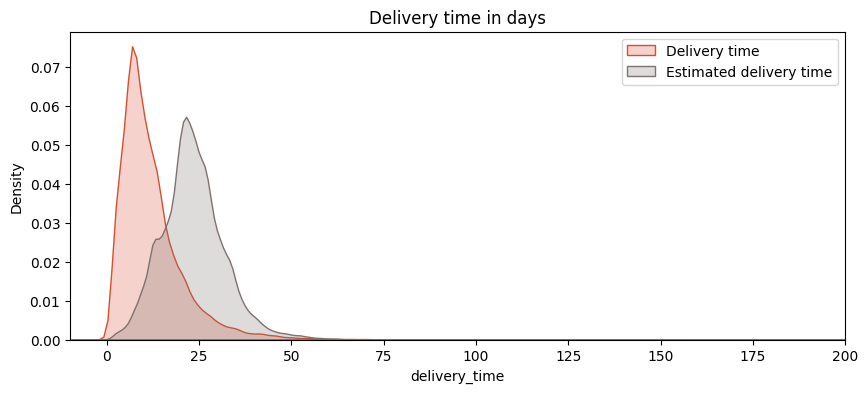

In [174]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_delivered_timestamp'] = pd.to_datetime(orders['order_delivered_timestamp'])
# Calculate differences in hours
orders['delivery_time'] = (orders['order_delivered_timestamp'] - orders['order_approved_at']).dt.total_seconds() / 86400
orders['estimated_delivery_time'] = (orders['order_estimated_delivery_date'] - orders['order_approved_at']).dt.total_seconds() / 86400
# Delivery estimated time and actual delivery time
plt.figure(figsize=(10,4))
plt.title("Delivery time in days")
plt.xlim(-10, 200)

ax1 = sns.kdeplot(orders['delivery_time'].dropna(), color="#D84E30" , shade=True , label='Delivery time')
ax2 = sns.kdeplot(orders['estimated_delivery_time'].dropna(), color="#7E7270", shade=True, label='Estimated delivery time')
plt.gca().legend(('Delivery time','Estimated delivery time'))
plt.show()

In [84]:
def single_countplot(df, ax, x = None, y = None, top = None, order = True, hue = False, palette = 'gist_earth',
                     width = 0.75, sub_width = 0.3, sub_size = 12):
    
    #Check plotting by breaking some categorical variables
    ncount = len(df)
    if x:
        col = x
    else:
        col = y

    #Plot top categorical variables
    if top is not None:
        cat_count = df[col].value_counts()
        top_categories = cat_count[:top].index
        df = df[df[col].isin(top_categories)]

    #Validate arguments and plotting graph
    if hue != False:
        if order:
            sns.countplot(x = x, y = y, data = df, palette = palette, ax = ax,
                          order = df[col].value_counts().index, hue = hue)
        else:
            sns.countplot(x = x, y = y, data = df, palette = palette, ax = ax, hue = hue)
    else:
        if order:
            sns.countplot(x = x, y = y, data = df, palette = palette, ax = ax, order = df[col].value_counts().index)
        else:
            sns.countplot(x = x, y = y, data = df, palette = palette, ax = ax)

    #Add percentage label
    if x:
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), ha = 'center', va = 'bottom')
    else:
        for p in ax.patches:
            x = p.get_bbox().get_points()[1, 0]
            y = p.get_bbox().get_points()[:, 1]
            ax.annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va = 'center')


In [85]:
#Select timestamp features from ordersData dataset
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_estimated_delivery_date']

#Iterate through timestamp_cols and change type to datetime
for col in timestamp_cols:
    orders[col] = pd.to_datetime(orders[col])
    
#Extract attributes on purchase date - (year and month)
orders['order_purchase_year'] = orders['order_purchase_timestamp'].apply(lambda x: x.year)
orders['order_purchase_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.month)
orders['order_purchase_month_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
orders['order_purchase_year_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
orders['order_purchase_date'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

#Extract attributes on purchase date - (day and day of week)
orders['order_purchase_day'] = orders['order_purchase_timestamp'].apply(lambda x: x.day)
orders['order_purchase_dayofweek'] = orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
orders['order_purchase_dayofweek_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

#Extract attributes on purchase date - (hour and time of day)
orders['order_purchase_hour'] = orders['order_purchase_timestamp'].apply(lambda x: x.hour)

#Create hour bins and labels
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
orders['order_purchase_time_day'] = pd.cut(orders['order_purchase_hour'], hours_bins, labels = hours_labels)

#Display new dataframe after transformations
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,delivery_time,estimated_delivery_time,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,12.502292,17.858021,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,9.382708,26.628206,2018,8,Aug,201808,20180808,8,2,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,13.196331,26.176400,2017,11,Nov,201711,20171118,18,5,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,2.830938,12.069109,2018,2,Feb,201802,20180213,13,1,Tue,21,Night


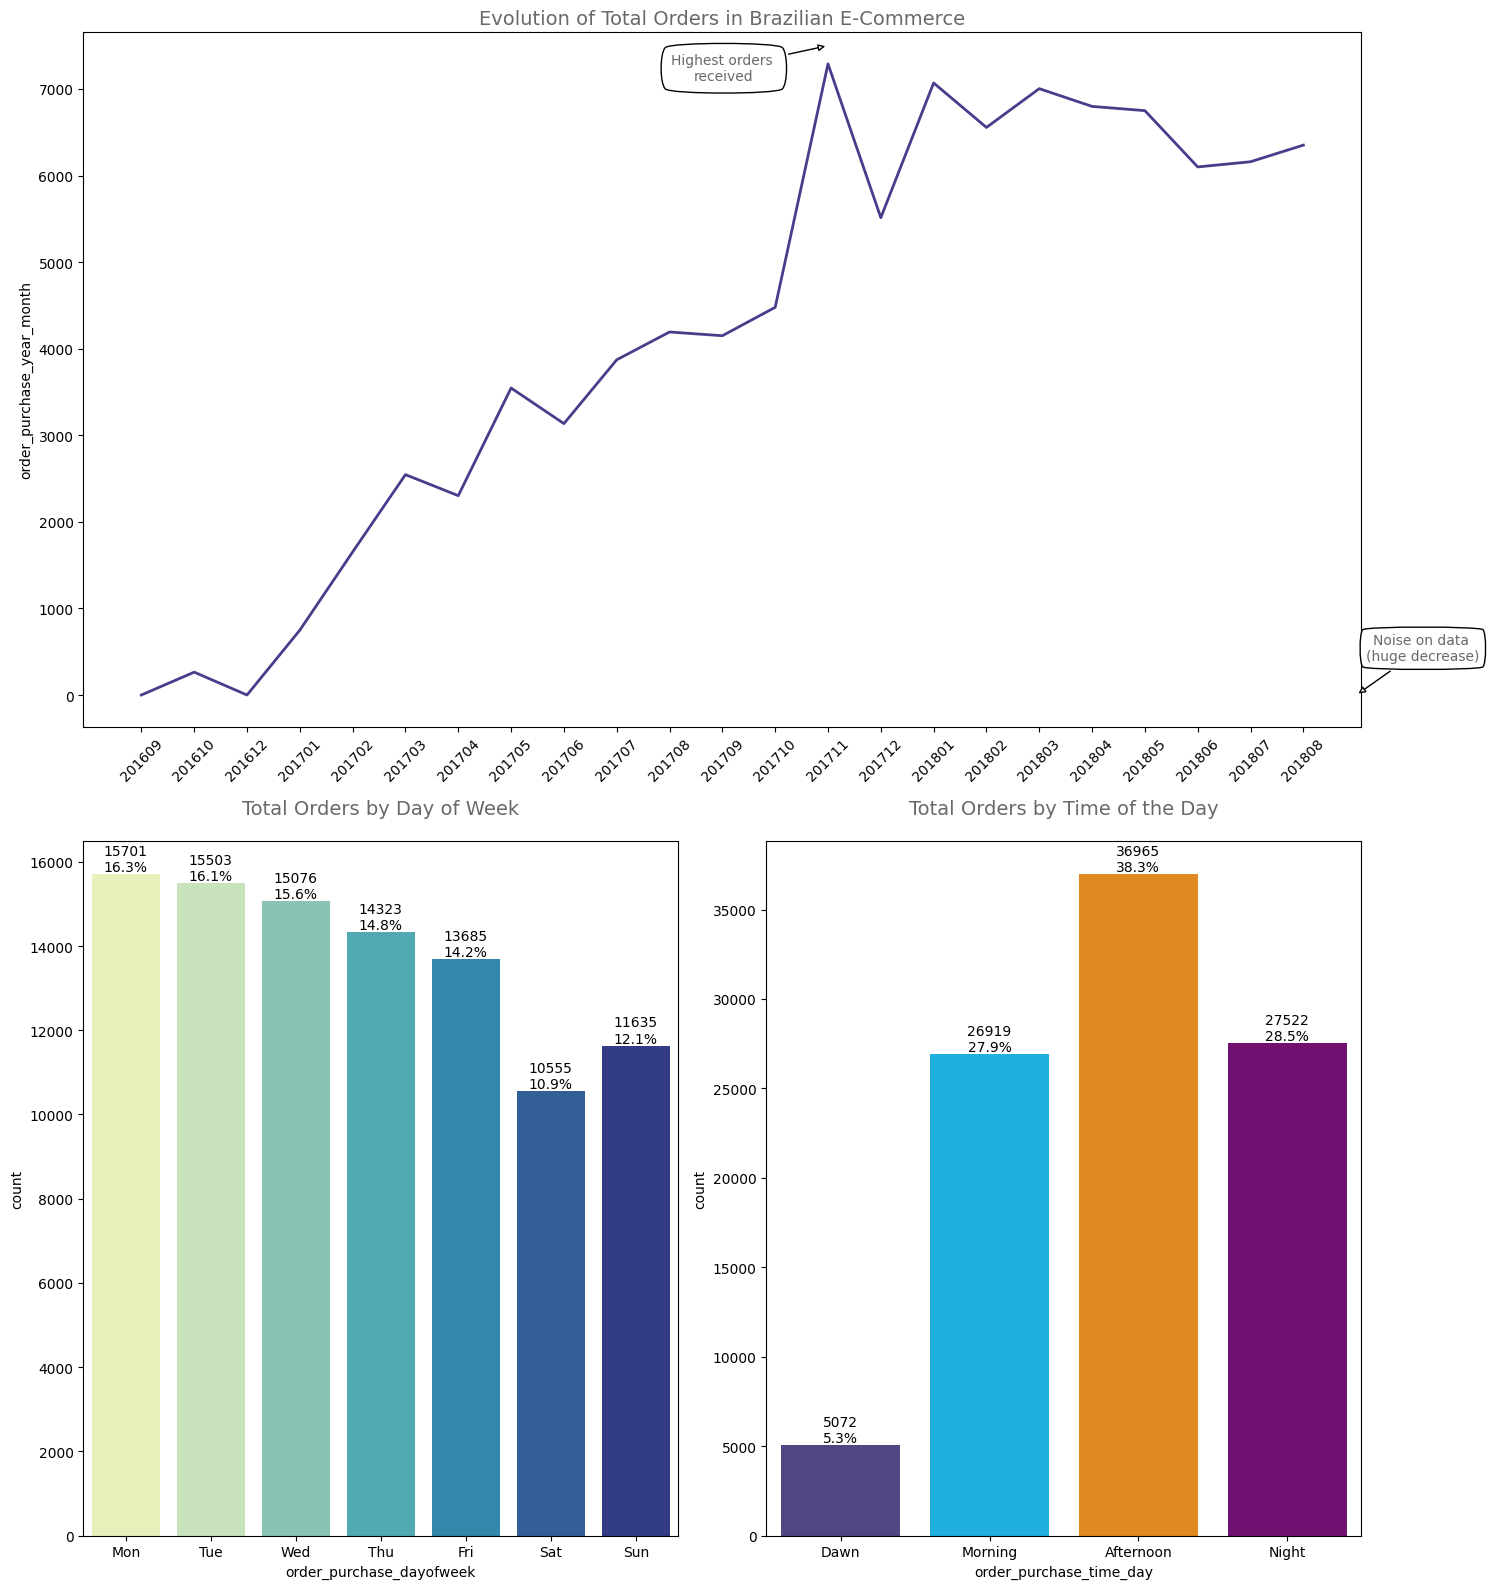

In [86]:
#Import package for plotting
from matplotlib.gridspec import GridSpec

#Initialize plot
fig = plt.figure(constrained_layout = True, figsize = (15, 16))

#Define axes
gs = GridSpec(2, 2, figure = fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

#Lineplot displaying the evolution of e-commerce orders over time 
sns.lineplot(data = orders['order_purchase_year_month'].value_counts().sort_index(), ax = ax1, 
             color = 'darkslateblue', linewidth = 2)

ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext = (-75, -25), 
             textcoords = 'offset points', bbox = dict(boxstyle = "round4", fc = "w", pad = .8),
             arrowprops = dict(arrowstyle = '-|>', fc = 'w'), color = 'dimgrey', ha = 'center')

ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext = (48, 25), 
             textcoords = 'offset points', bbox = dict(boxstyle = "round4", fc = "w", pad = .5),
             arrowprops = dict(arrowstyle = '-|>', fc = 'w'), color = 'dimgrey', ha = 'center')
  
#Set the ticks and title
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size = 14, color = 'dimgrey')

#Barchart displaying total of orders by day of week
single_countplot(orders, x = 'order_purchase_dayofweek', ax = ax2, order = False, palette = 'YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size = 14, color = 'dimgrey', pad = 20)

#Barchart displaying total of orders by time of day
day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
single_countplot(orders, x = 'order_purchase_time_day', ax = ax3, order = False, palette = day_color_list)
ax3.set_title('Total Orders by Time of the Day', size = 14, color = 'dimgrey', pad = 20)

#Display plots
plt.tight_layout()
plt.show()


In [87]:
#Filter data between January 2017 and August 2018
orders_filt = orders[(orders['order_purchase_year_month'].astype(int) >= 201701)]
orders_filt = orders_filt[(orders_filt['order_purchase_year_month'].astype(int) <= 201808)]

Let's explore the customers data.

In [88]:
# Read customers data

customers = pd.read_excel("Retail_dataset.xlsx", sheet_name="customers")
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [89]:
# Check the shape

customers.shape

(99441, 4)

In [90]:
# Check column info

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [91]:
# Check for any duplicates

customers.customer_id.duplicated().sum()

3345

In [92]:
customers[customers.customer_id.duplicated()]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
679,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...
99324,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


We have 3345 rows with duplicate data.
We will only keep the first occurrence of any such value and drop the rest (duplicated ones) to get rid of the duplicate records.

In [93]:
# Drop duplicate customer ids, keep only the first occurance

customers.drop_duplicates(subset="customer_id", keep="first", inplace=True)

In [94]:
# Check the shape again

customers.shape

(96096, 4)

In [95]:
# Check for any more duplicates

customers.customer_id.duplicated().sum()

0

In [96]:
# Check for missing vlaues

customers.isna().sum().sort_values(ascending=False)

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

We do not have any duplicates.

We do not have any missing value.

Next, we will read the payment information.

In [97]:
order = customers['customer_state'].value_counts().reset_index().rename(columns={'index':'state','customer_state':'count'})

In [98]:
order = customers['customer_city'].value_counts().reset_index().rename(columns={'index':'state','customer_city':'count'}).head(10)

In [99]:
fig = go.Figure(go.Bar(y=order['state'], x=order['count'], # Need to revert x and y axis
                      orientation="h", text=order['count'],
    textposition = "outside", marker={'color': order['count'], 
    'colorscale': 'bluyl'})) 
fig.update_layout(title_text='Customer count of each state',
                  xaxis_title="count",yaxis_title="State", 
                  width=1000, height=700, yaxis={'categoryorder':'total ascending'})
fig.show()

In [101]:
# Read the payments data

payments = pd.read_excel("Retail_dataset.xlsx", sheet_name="payments")
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [102]:
# Check the shape

payments.shape

(103886, 5)

In [103]:
# Check column info

payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [104]:
# Check for any duplicates

payments[['order_id','payment_sequential']].duplicated().sum()

0

In [105]:
# Check for missing values

payments.isna().sum().sort_values(ascending=False)

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

No duplicates or missing values were found.

Let's explore product information.

In [106]:
# Read products data

products = pd.read_excel("Retail_dataset.xlsx", sheet_name="products")
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [107]:
# Check the shape

products.shape

(32951, 6)

In [108]:
# Check column info

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32781 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [109]:
# Check for any duplicates

products.product_id.duplicated().sum()

0

In [110]:
# Check for missing values

products.isna().sum().sort_values(ascending=False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [111]:
# Check the value count of product_category_name column

products.product_category_name.value_counts(normalize=True)*100

toys                                 75.424789
bed_bath_table                        2.406882
sports_leisure                        2.199445
furniture_decor                       2.095726
health_beauty                         1.976755
                                       ...    
fashion_childrens_clothes             0.003051
diapers_and_hygiene                   0.003051
home_comfort_2                        0.003051
security_and_services                 0.003051
furniture_mattress_and_upholstery     0.003051
Name: product_category_name, Length: 70, dtype: float64

Since 75% of the data belongs to the 'toys' category, we can replace the missing values of the product_category_name column with the 'toys'

In [112]:
# Replace the missing value with mode i.e. "toys"

products.product_category_name.fillna(products.product_category_name.mode()[0], inplace=True)

In [113]:

# Check for missing values again

products.isna().sum().sort_values(ascending=False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

The product width, height, length, and weight are numerical values. Let's describe the data to see these columns' distribution and other statistical deals.

In [114]:
# Describe

products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


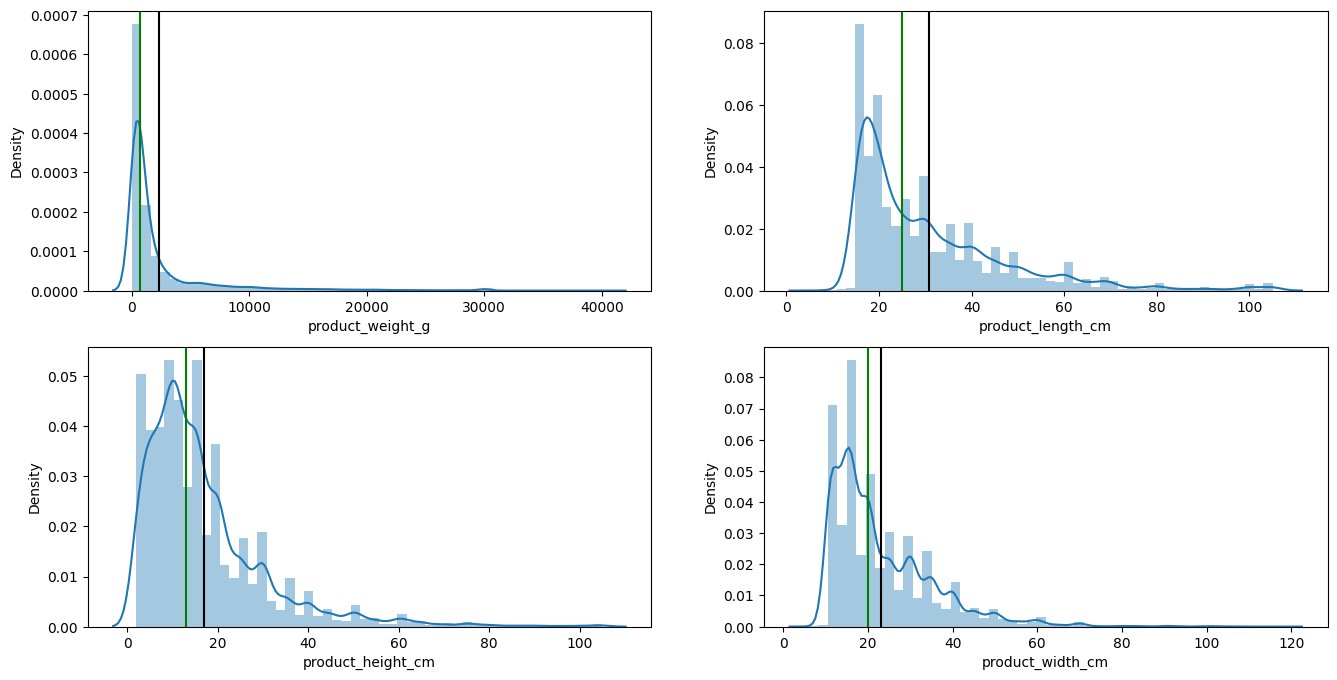

In [115]:
# Check the distribution

plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(products.product_weight_g)
plt.axvline(products.product_weight_g.mean(), color="black")
plt.axvline(products.product_weight_g.median(), color="green")
#plt.show()

plt.subplot(2,2,2)
sns.distplot(products.product_length_cm)
plt.axvline(products.product_length_cm.mean(), color="black")
plt.axvline(products.product_length_cm.median(), color="green")
#plt.show()

plt.subplot(2,2,3)
sns.distplot(products.product_height_cm)
plt.axvline(products.product_height_cm.mean(), color="black")
plt.axvline(products.product_height_cm.median(), color="green")
#plt.show()

plt.subplot(2,2,4)
sns.distplot(products.product_width_cm)
plt.axvline(products.product_width_cm.mean(), color="black")
plt.axvline(products.product_width_cm.median(), color="green")

plt.show()

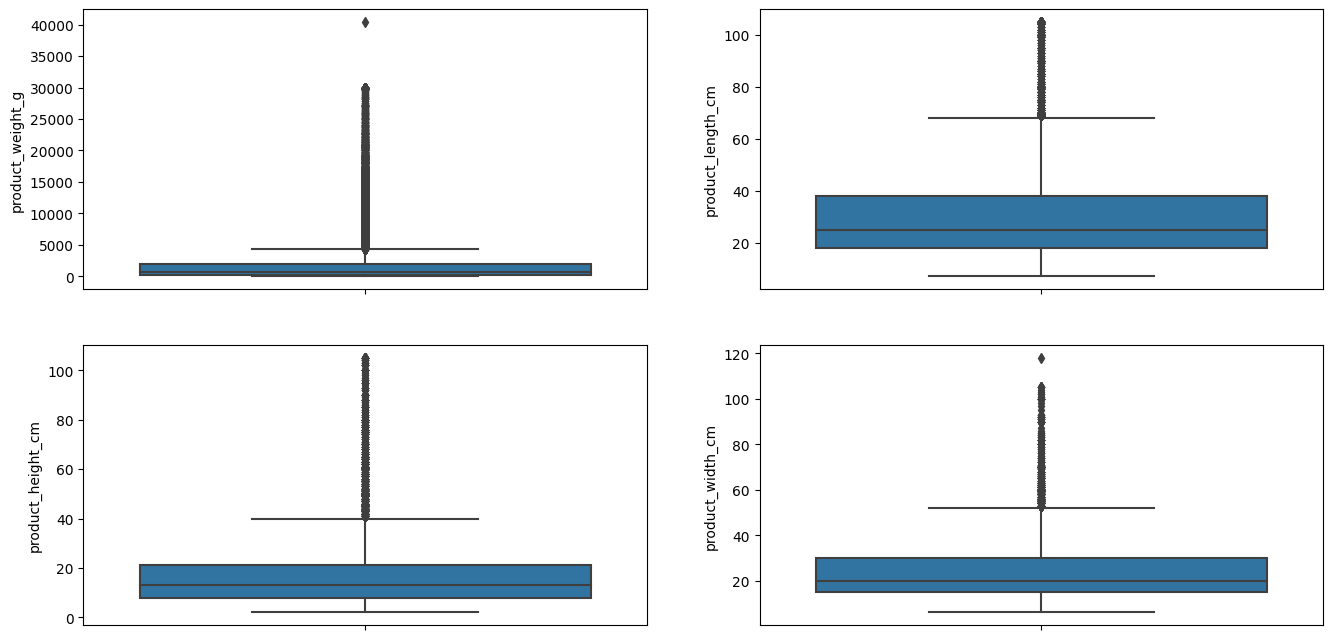

In [116]:
# Check the distribution

plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.boxplot(y= products.product_weight_g)

plt.subplot(2,2,2)
sns.boxplot(y= products.product_length_cm)

plt.subplot(2,2,3)
sns.boxplot(y= products.product_height_cm)

plt.subplot(2,2,4)
sns.boxplot(y= products.product_width_cm)


plt.show()

We can see that the data is right-skewed, and there is no significant outlier; instead of using the mean, we will use the median to replace the missing values.

In [117]:
# Consider only the numerical columns for the missing value treatment

num_cols = products.describe().columns.to_list()
num_cols

['product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [118]:
for i in num_cols:
    products[i].fillna(products[i].median(), inplace=True)

In [119]:
# Check for missing values again

products.isna().sum().sort_values(ascending=False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

Now that all data frames are free of duplicates and missing values, let's export each into new sheets.

In [120]:
# Create a Pandas Excel writer using XlsxWriter as the engine

writer = pd.ExcelWriter('Retail_Dataset_Cleaned.xlsx', engine='xlsxwriter')

In [121]:
# Write each dataframe to a different worksheet.

orders.to_excel(writer, sheet_name='Orders', index = False)
order_items.to_excel(writer, sheet_name='Order_items', index = False)
customers.to_excel(writer, sheet_name='Customers', index = False)
payments.to_excel(writer, sheet_name='Payments', index = False)
products.to_excel(writer, sheet_name='Products', index = False)

In [122]:
# Close the Pandas Excel writer and output the Excel file

writer.save()
print("Files exported successfully.")

Files exported successfully.


Files exported successfully.

In [123]:
# Check if the export was successful

import os
os.getcwd()

'c:\\Users\\Admin\\Desktop\\CapstoneProject_DA_DuongPhamThanh'

NOTE: We will use this cleaned data file to build necessary visualizations and dashboards in Tableau.

Market Basket Analysis
Market basket analysis is a technique that helps us cross-sell effectively by building strategies using the data of the purchases. This is because cross-selling can help increase profits by recommending groups of similar items to consumers. Using market basket analysis, we try to identify the strength of the association between two products. Market basket analysis would help us identify combinations of products that are bought frequently.

Here we will perform a market basket analysis based on product_category_name

Data Preparation
We will use the cleaned data set to prepare data for Market Basket analysis.

In [124]:
#Read Order_items data

df1 = pd.read_excel("Retail_Dataset_Cleaned.xlsx", sheet_name="Order_items")
df1.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [125]:
#Check the shape

df1.shape

(112650, 6)

In [126]:
# Read Products data

df2 = pd.read_excel("Retail_Dataset_Cleaned.xlsx", sheet_name="Products")
df2.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,baby,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,housewares,625,20,17,13


In [127]:
# Check the shape

df2.shape

(32951, 6)

In [128]:
# Merge both data frames using the common column product_id

df = pd.merge(df1, df2, on = 'product_id', how = 'inner', indicator = True)
df.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650,28,9,14,both
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650,28,9,14,both
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650,28,9,14,both
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650,28,9,14,both
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650,28,9,14,both


In [129]:
# Check the shape of merged data frame

df.shape

(112650, 12)

In [130]:
# For our analysis we will only need the product category name and the order_id. 
# So, filter the data frame to have only the required columns

df = df[['order_id','product_category_name']]
df.head()

,order_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,toys
1,130898c0987d1801452a8ed92a670612,toys
2,532ed5e14e24ae1f0d735b91524b98b9,toys
3,6f8c31653edb8c83e1a739408b5ff750,toys
4,7d19f4ef4d04461989632411b7e588b9,toys


In [131]:
# Check the shape again

df.shape

(112650, 2)

In [132]:
# # Create a Pandas Excel writer using XlsxWriter as the engine

writer = pd.ExcelWriter('Market_Basket_Analysis.xlsx', engine='xlsxwriter')

In [133]:
# Write the dataframe to two different worksheets as we need to create self-join in Tableau for Market Basket Analysis. 

df.to_excel(writer, sheet_name='Order_ProductCat_1', index = False)
df.to_excel(writer, sheet_name='Order_ProductCat_2', index = False)

In [134]:
# Close the Pandas Excel writer and output the Excel file

writer.save()
print("Files exported successfully.")

Files exported successfully.


In [135]:
# Check if the export was successful

import os
os.getcwd()

'c:\\Users\\Admin\\Desktop\\CapstoneProject_DA_DuongPhamThanh'

Data preparation for use in geospatial analysis

In [145]:
#Merge ordersData and order_items into one unique dataset
df_orders_items = orders.merge(order_items, how = 'left', on = 'order_id')


Get an overview of customer's orders by region, state and city between 2017 and 2018

In [167]:
#Filter data between January 2017 and August 2018
df_orders_filt = df_orders_items[(df_orders_items['order_purchase_year_month'].astype(int) >= 201701)]
df_orders_filt = df_orders_filt[(df_orders_filt['order_purchase_year_month'].astype(int) <= 201808)]


Most Frequent Payment Type & Price Distribution

Set-up dataset and feature for plot

In [138]:
#Create dataset methodPurchase using itemsData and paymentData datasets
methodPurchase = pd.merge(order_items, payments, on = 'order_id')

In [139]:
#Get the logarithmic price
methodPurchase['price_log'] = np.log(methodPurchase['price'] + 1.5)

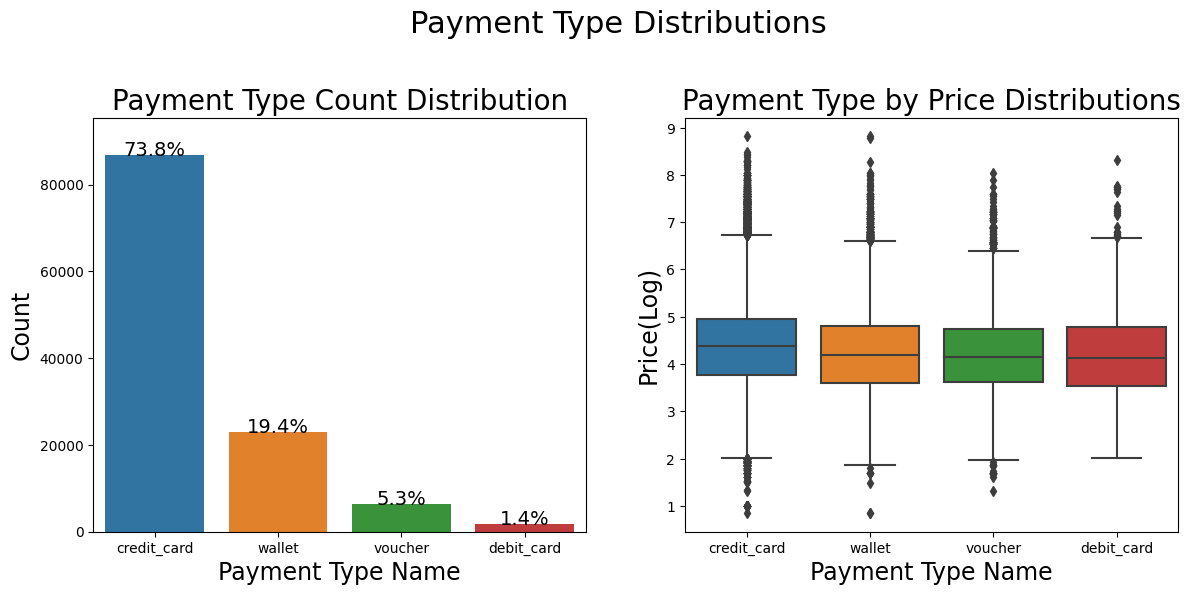

In [140]:
#Get length of dataset
total = len(methodPurchase)

#Initialize plot and set main title
plt.figure(figsize = (14,6))
plt.suptitle('Payment Type Distributions', fontsize = 22)

#Plot payment type count distribution
plt.subplot(121)
g = sns.countplot(x = 'payment_type', data = methodPurchase[methodPurchase['payment_type'] != 'not_defined'])
g.set_title("Payment Type Count Distribution", fontsize = 20)
g.set_xlabel("Payment Type Name", fontsize = 17)
g.set_ylabel("Count", fontsize = 17)

#Set plot and label format
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format(height/total*100),
            ha = "center", fontsize = 14) 
    
g.set_ylim(0, max(sizes) * 1.1)

#Plot payment type by price distributions
plt.subplot(122)
g = sns.boxplot(x = 'payment_type', y = 'price_log',
                data = methodPurchase[methodPurchase['payment_type'] != 'not_defined'])

#Set plot labels
g.set_title("Payment Type by Price Distributions", fontsize = 20)
g.set_xlabel("Payment Type Name", fontsize = 17)
g.set_ylabel("Price(Log)", fontsize = 17)

plt.subplots_adjust(hspace = 0.5, top = 0.8)

plt.show()

More than 73.8% of all sales are of the payment type credit card. Second most common payment type is "boleto"(bank slip) with almost 19.4%. The third more common payment type is voucher with 5.3%

Online sales growth over time

Group data and create dictionary with features of interest

In [162]:
#Group data to look at evolution (use df_orders_filt df created before that looks at data between 2017 and 2018 only)
df_month_aggreg = df_orders_filt.groupby(by = ['order_purchase_year', 'order_purchase_year_month'], as_index = False)

#Create dictionary
df_month_aggreg = df_month_aggreg.agg({
    'order_id': 'count',
    'price': 'sum'
})


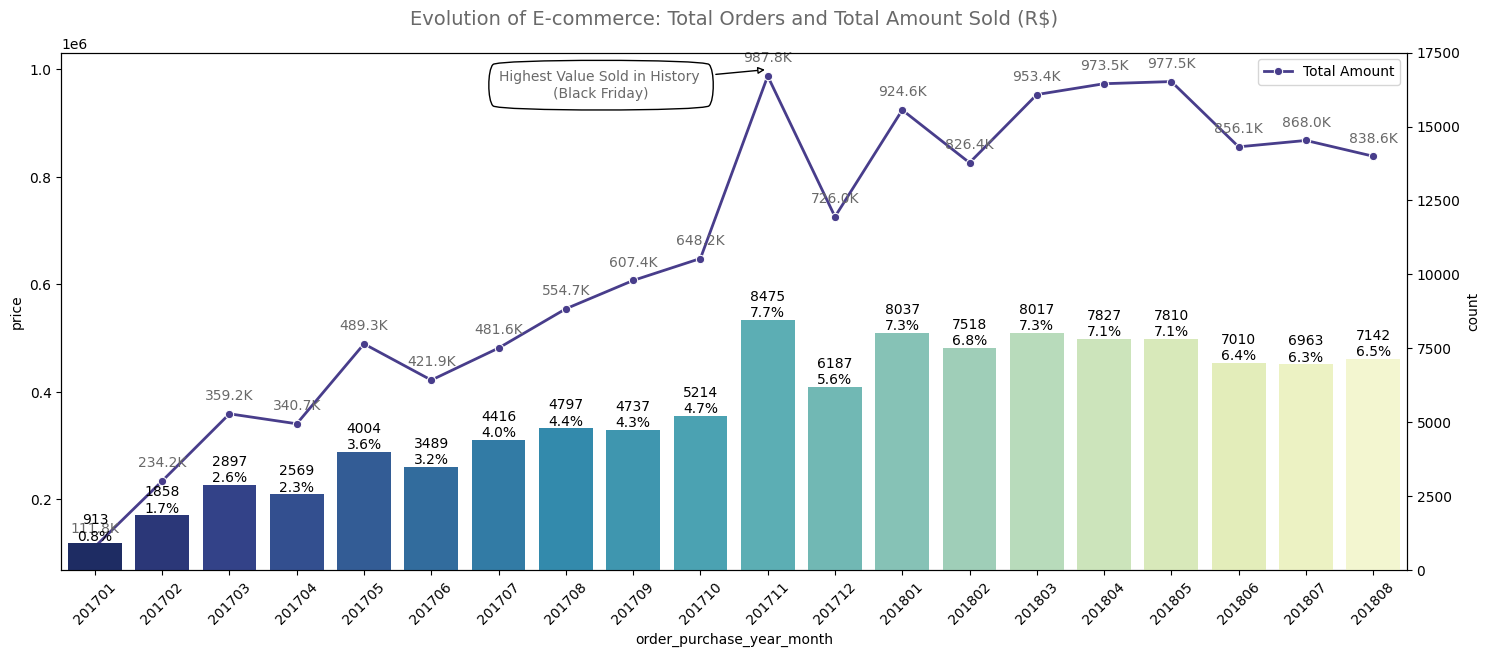

In [170]:
#Initialize the plot
fig = plt.figure(constrained_layout = True, figsize = (15, 12))

#Define axes
gs = GridSpec(2, 3, figure = fig)
ax1 = fig.add_subplot(gs[0, :])

#Plot the evolution of total orders and total sales on e-commerce
sns.lineplot(x = 'order_purchase_year_month', y = 'price', ax = ax1, data = df_month_aggreg, linewidth = 2, 
             color = 'darkslateblue', marker = 'o', label = 'Total Amount')
ax1_twx = ax1.twinx()
single_countplot(df_orders_filt.sort_values(by = 'order_purchase_year_month', ascending = True).reset_index(drop = True), x = 'order_purchase_year_month', ax = ax1_twx, order = False, palette = 'YlGnBu_r')
ax1_twx.set_yticks(np.arange(0, 20000, 2500))

#Customize the plot
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
for x, y in df_month_aggreg.price.items():
    ax1.annotate(str(round(y/1000, 1))+'K', xy = (x, y), textcoords = 'offset points', xytext = (0, 10),
                ha = 'center', color = 'dimgrey')
ax1.annotate(f'Highest Value Sold in History \n(Black Friday)', (10, 1000000), xytext = (-120, -20), 
             textcoords = 'offset points', bbox = dict(boxstyle = "round4", fc = "w", pad = .8),
             arrowprops = dict(arrowstyle = '-|>', fc = 'w'), color = 'dimgrey', ha = 'center')
ax1.set_title('Evolution of E-commerce: Total Orders and Total Amount Sold (R$)', size = 14, color = 'dimgrey', pad = 20)

#Show plot
plt.tight_layout()
plt.show()


From the above graph, it can be seen that sales are generally growing over time which can indicate that online shopping is gaining popularity in Brazil. The peak was recorded in November 2017 (this can be related to Black Friday which usually occurs in the month of November ~ in this period usually online shopping is expected to grow exponentially as many people tend to buy in that period).

Next, we will use this data file to perform Market Basket analysis and check the product category association in Tableau.